# Exploratory Data Analysis , Feature Engineering & Model Building using Titanic Dataset

### Data Loading and Understanding 
* At first we load the titanic dataset and check its structure 
* Understand the features and target variables

In [5]:
# importing the necessary libraries
import pandas as pd # for handling datasets
import matplotlib.pyplot as plt # for generating plots, garphs etc.
import seaborn as sns

In [6]:
# Loading dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.info() # displays the basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head() # displays the first few rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum() # this is to see how many missing values are there in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# extracting the statistical summary of both numerical and categorical features

df.describe() # for numerical features
df.describe(include='object') # for categorical features


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# Checking for duplicates
df.duplicated().sum()

0

### Data Visualization (EDA)
We will be exploring the dataset visually using various plots and graphs and observe insights

C:\Users\aabin\AppData\Local\Temp\ipykernel_15216\799067254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Survived"], palette="coolwarm")


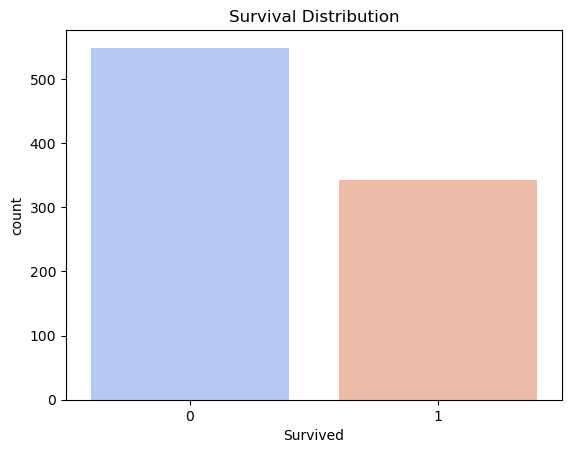

In [11]:
# creating a Countplot for checking the survival rate
sns.countplot(x=df["Survived"], palette="coolwarm")
plt.title("Survival Distribution")
plt.show()

# Number of people who survived is lesser compared to people who didn't survive

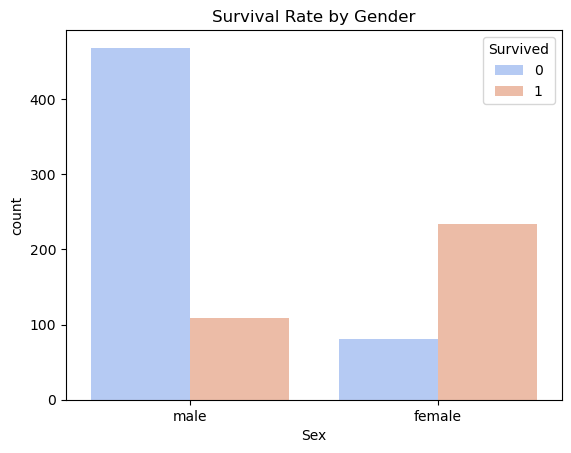

In [12]:
# creating a Countplot to check survival rate based on gender
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate of women are higher than that of men

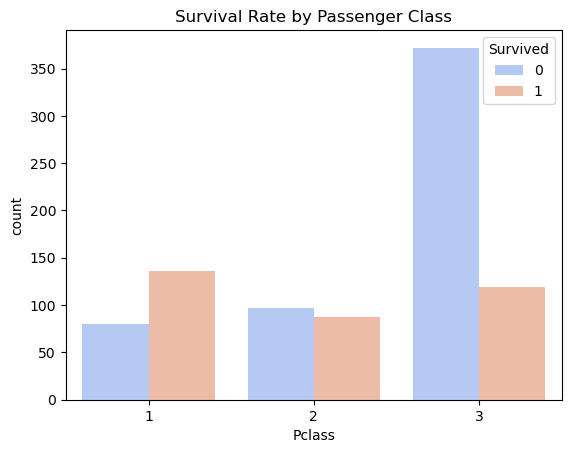

In [13]:
# Survival rate based on Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate of first class passengers are higher than other classes 
# Survival rate of Third class passengers are very low 

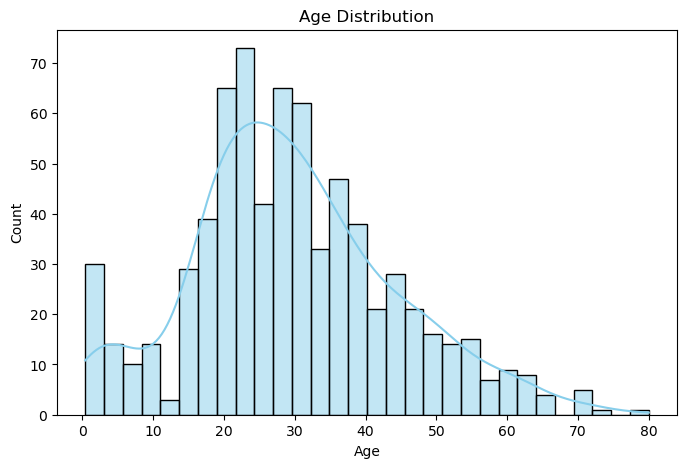

In [14]:
# Analyzing numerical features Age and Fare using histograms and box plots

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="skyblue") # dropna() ensures we don't plot any missing values
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Most people are around the age group of 20-30

C:\Users\aabin\AppData\Local\Temp\ipykernel_15216\2972698770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")


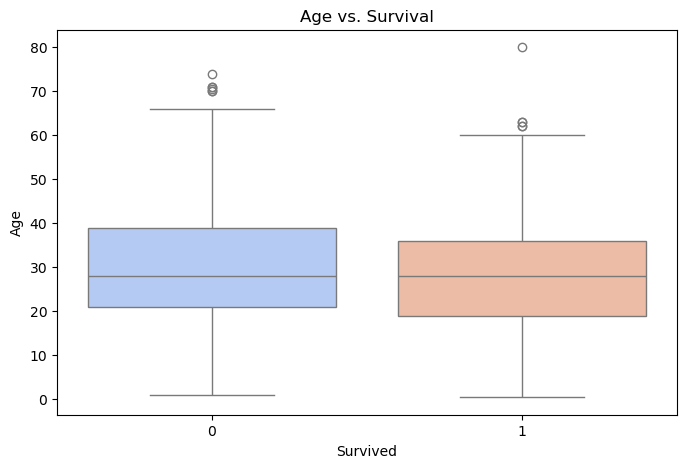

In [15]:
# Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
plt.title("Age vs. Survival")
plt.show()

# Younger passengers are more likely to survive

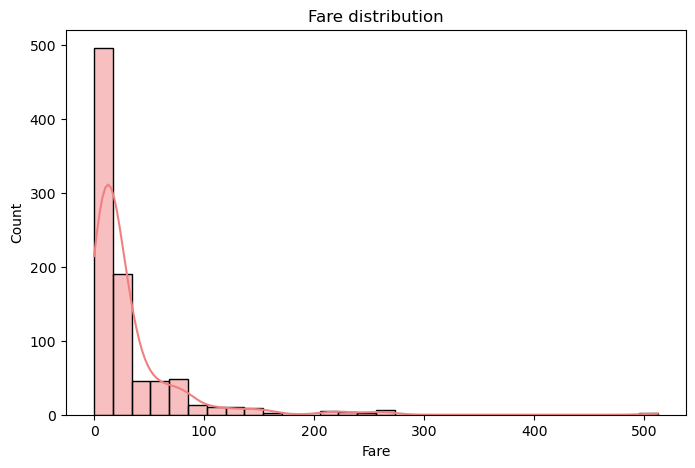

In [16]:
# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], bins=30, kde="True", color= "lightcoral")
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# this will help us see if some passengers paid significantly higher fares 

C:\Users\aabin\AppData\Local\Temp\ipykernel_15216\971221569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette='coolwarm')


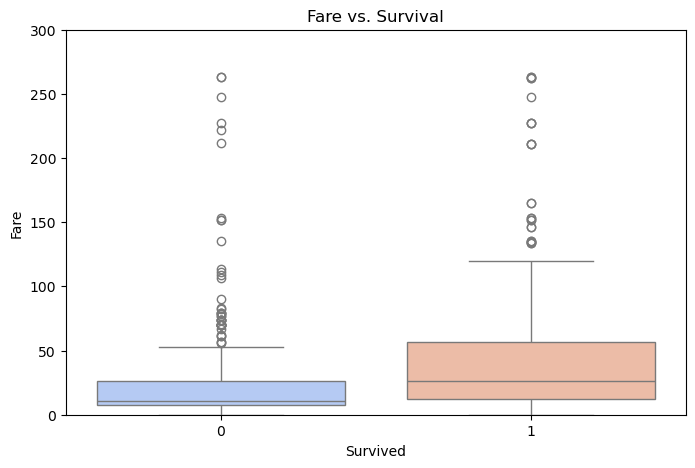

In [17]:
# Fare vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df, palette='coolwarm')
plt.ylim(0,300) # to handle ouliers
plt.title("Fare vs. Survival")
plt.show()

# higher fares may be linked to survival since higher-class passengers had better access to lifeboats

### Feature Engineering
Now we will perform feature engineering where we clean and transform the dataset
for model building 

In [20]:
# Handling Missing Values 
''' After we loaded the dataset and tried to understand the dataset and we came to know 
that there were  missing values in features like Age, Cabin and Embarked
so we try to identify these missing values and handle them.'''

# Replacing missing age values with median age per Pclass & Sex
df["Age"] = df["Age"].fillna(df.groupby(["Pclass","Sex"])["Age"].transform("median"))

In [21]:
# Fill missing Embarked values with the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\aabin\AppData\Local\Temp\ipykernel_15216\2982389149.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [22]:
# We will drop the Cabin column since it is mostly empty (around 687 values are missing)
df.drop(columns=["Cabin"], inplace=True)

In [23]:
# Convert categorical variables into numeric format
''' ML Models don't work with text values, so we will convert Sex and Embarked 
into numerical values '''
df["Sex"] = df["Sex"].map({"male":0, "female":1}) # encoding gender
df = pd.get_dummies(df, columns=["Embarked"],drop_first=True) # one-hot encoding Embarked

In [24]:
# Drop Unnecessary columns
df.drop(columns=["PassengerId","Name","Ticket"], inplace=True)

In [25]:
df.isnull().sum() # Final check for any missing values

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Splitting Data for Training and Testing
Before building the model, we need to:
* Seperate the target variable (Survived).
* Split the dataset into training and testing sets.

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (Y) 
X = df.drop(columns=["Survived"]) # the target is dropped so remaining are the independent features 
y = df["Survived"] # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [29]:
# Training a Machine Learning Model
''' We will be using the Logistic Regression Model, a simple and effective model for classification '''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



C:\Users\aabin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.776536312849162
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.75      0.62      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [31]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [36]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": np.arange(50, 300, 50),  # Random values in steps of 50
    "max_depth": [5, 10, 15, None],  # Include None for unlimited depth
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    n_iter=10,  # Only test 10 random parameter sets (faster)
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
    random_state=42
)

random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Parameters:", random_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Tuned Random Forest Accuracy: 0.8100558659217877
Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       110
           1       0.86      0.61      0.71        69

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.79       179
weighted avg       0.82      0.81      0.80       179



### Saving the Trained Model

In [37]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf, "titanic_rf_model.pkl")
print("Model saved as titanic_rf_model.pkl")

Model saved as titanic_rf_model.pkl


In [38]:
# Saving the preprocessed Dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("Cleaned dataset saved as titanic_cleaned.csv")

Cleaned dataset saved as titanic_cleaned.csv
